# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


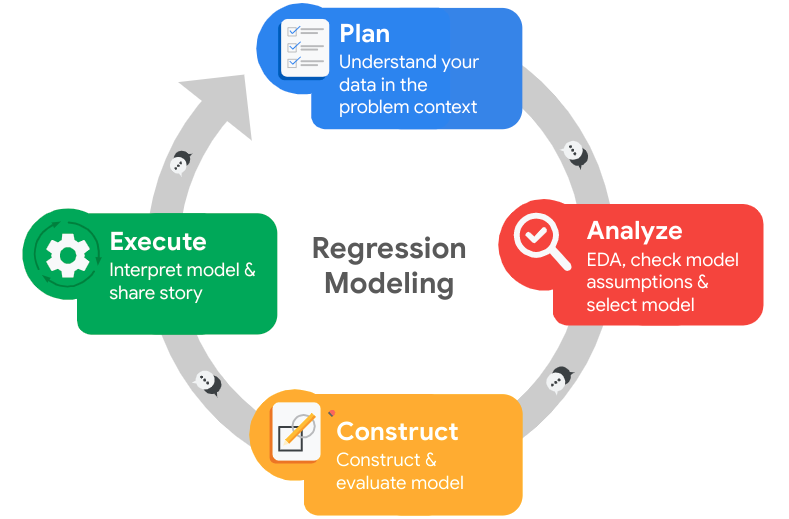

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
#Packages for logistic regression
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
#Packages for random forest tree
import pickle as pkl
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###


In [5]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.columns = map(str.lower, df0.columns)
df0.head(10)


# Display all column names after the update
### YOUR CODE HERE ###


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [6]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().any(axis=1).sum()



0

### Check duplicates

Check for any duplicate entries in the data.

In [7]:
# Check for duplicates
### YOUR CODE HERE ###
print(df0.duplicated().value_counts())
#print(df0.drop_duplicates())
df0 = df0.drop_duplicates()
df0_dummies = pd.get_dummies(df0, 
                                         columns=['department','salary'])

df0_dummies.head(10)


False    11991
True      3008
dtype: int64


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0.10,0.77,6,247,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,0.92,0.85,5,259,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0.89,1.00,5,224,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0.42,0.53,2,142,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [9]:
# Inspect some rows containing duplicates as needed
#!pip install imblearn
#pip uninstall -v scikit-learn
#pip install -v scikit-learn

### YOUR CODE HERE ###
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler()
#rus_X_train, rus_y_train = rus.fit_resample(X_train, y_train)

### Check outliers

Check for outliers in the data.

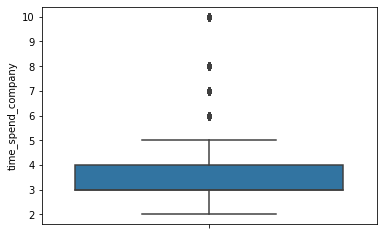

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(data=df0_dummies,y = 'time_spend_company')




In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
 ###

# Compute the 25th percentile value in `tenure`
percentile25 = df0_dummies['time_spend_company'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df0_dummies['time_spend_company'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df0_dummies[(df0_dummies['time_spend_company'] > upper_limit) | (df0_dummies['time_spend_company'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `time_spend_company`:", len(outliers))
#df_for_log = df0_dummies[(df0_dummies['time_spend_company'] < upper_limit) | (df0_dummies['time_spend_company'] > lower_limit)]
df_for_log = df0_dummies
index = df_for_log[(df_for_log['time_spend_company'] >= upper_limit) | (df_for_log['time_spend_company'] <= lower_limit)].index
df_for_log.drop(index, inplace=True)
df_for_log.describe()

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `time_spend_company`: 824


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
count,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,...,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000
mean,0.631944,0.715901,3.786066,200.144533,3.109161,0.152413,0.168532,0.014417,0.081938,0.058118,...,0.051043,0.032238,0.055252,0.057401,0.268380,0.154115,0.189308,0.079162,0.486165,0.434674
std,0.239064,0.167595,1.164198,48.563047,0.899277,0.359437,0.374355,0.119209,0.274282,0.233976,...,0.220096,0.176639,0.228482,0.232618,0.443136,0.361075,0.391770,0.270003,0.499831,0.495736
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.490000,0.570000,3.000000,157.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,199.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df_for_log['left'].value_counts()
# Get percentages of people who left vs. stayed
df_for_log['left'].value_counts(normalize=True)
### YOUR CODE HERE ###


0    0.831468
1    0.168532
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [38]:
# Create a plot as needed
### YOUR CODE HERE ###

In [43]:
# Create a plot as needed
### YOUR CODE HERE ###


0.22.2.post1


In [14]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_for_log), columns=df_for_log.columns)
print(df_normalized)

       satisfaction_level  last_evaluation  number_project  \
0                0.318681         0.265625             0.0   
1                0.021978         0.812500             1.0   
2                0.692308         0.796875             0.6   
3                0.307692         0.250000             0.0   
4                0.351648         0.218750             0.0   
...                   ...              ...             ...   
11162            0.692308         0.437500             0.4   
11163            0.428571         0.218750             0.6   
11164            0.109890         0.671875             0.4   
11165            0.582418         0.765625             0.2   
11166            0.450549         0.578125             0.4   

       average_montly_hours  time_spend_company  work_accident  left  \
0                  0.285047            0.333333            0.0   1.0   
1                  0.822430            0.666667            0.0   1.0   
2                  0.593458            

In [15]:
###Logistic Regression### <---- first model
# Create a plot as needed
#!pip install --force-reinstall scikit-learn

### YOUR CODE HERE ###
y = df_normalized['left']
X = df_normalized.drop('left', axis=1)
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(
#    sampling_strategy='auto',
#    random_state=0, 
#)  
#X_resampled, y_resampled = rus.fit_resample(X, y)

In [16]:
# Create a plot as needed

### YOUR CODE HERE ###
%%time

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
clf_log = LogisticRegression(solver='liblinear').fit(X_train,y_train)
clf_log.coef_


array([[-4.0620679 , -0.08682325, -2.24307126,  0.73512119,  3.07651129,
        -1.537501  , -0.66757923, -0.05497489, -0.43689339, -0.06389713,
         0.03194958, -0.06211492, -0.00565643, -0.11777622,  0.14282433,
        -0.04720289,  0.05587853, -1.07156287,  0.46627586,  0.04742358]])

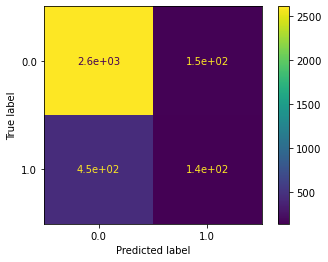

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
y_pred_log = clf_log.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred_log, labels = clf_log.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf_log.classes_)
disp.plot()


In [20]:
table = pd.DataFrame()

    # Create table of results
table = pd.DataFrame({'Model': 'LogisticRegression',
                          'F1': metrics.f1_score(y_test, y_pred_log),
                          'Recall': metrics.recall_score(y_test, y_pred_log),
                          'Precision': metrics.precision_score(y_test, y_pred_log),
                          'Accuracy': metrics.accuracy_score(y_test, y_pred_log)
                    }, index=[0]
                    )


In [23]:
table

,Model,F1,Recall,Precision,Accuracy
0,LogisticRegression,0.313501,0.232598,0.480702,0.820949


In [27]:

# Create a plot as needed
### YOUR CODE HERE ###
import plotly.express as px
fig = px.imshow(df0_dummies.corr())
fig.show()

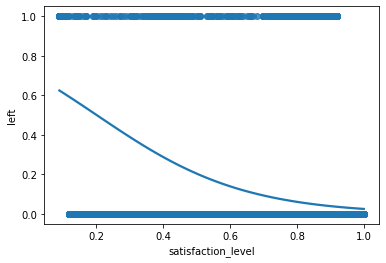

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.regplot(x="satisfaction_level", y="left", data=df0_dummies, logistic=True, ci=None)

In [29]:
# Create a plot as needed
### YOUR CODE HERE ###
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred_log))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_log))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_log))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_log))

Accuracy: 0.820949
Precision: 0.480702
Recall: 0.232598
F1 Score: 0.313501


### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [30]:
### YOUR CODE HERE ### <------ Decision Tree
%%time

y = df0_dummies['left']
X = df0_dummies.drop('left', axis=1)

decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.971352
Precision: 0.911519
Recall: 0.926995
F1 Score: 0.919192


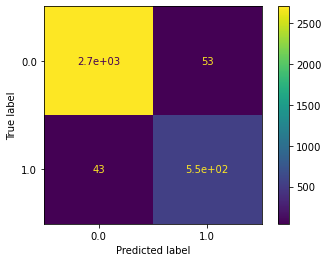

In [31]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

In [32]:
# We add the results from our Decision Tree into table1 for future adding into table
table_decision_tree = pd.DataFrame()

    # Create table of results
table_decision_tree = pd.DataFrame({'Model': 'DecisionTreeClassifier',
                          'F1': metrics.f1_score(y_test, dt_pred),
                          'Recall': metrics.recall_score(y_test, dt_pred),
                          'Precision': metrics.precision_score(y_test, dt_pred),
                          'Accuracy': metrics.accuracy_score(y_test, dt_pred)
                    }, index=[0]
                    )

In [33]:
table = table.append(table_decision_tree, ignore_index=True)


In [34]:
table

,Model,F1,Recall,Precision,Accuracy
0,LogisticRegression,0.313501,0.232598,0.480702,0.820949
1,DecisionTreeClassifier,0.919192,0.926995,0.911519,0.971352


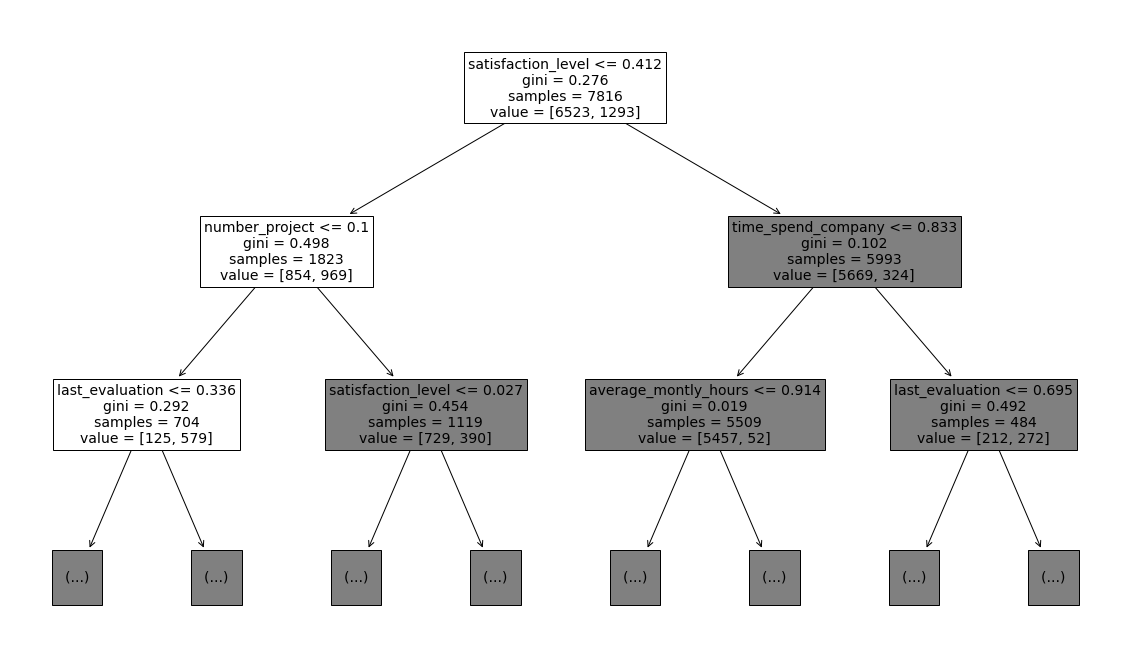

In [35]:
# On the decision tree below we will see which driven factors was counted as main in the decision model we made
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns);

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



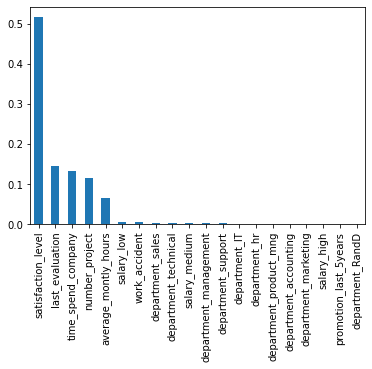

In [36]:
# We will see how importan is each factor of data set for the decision tree
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

In [37]:
# Model for fitting results into table
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
  
    return table
#result_table = make_results("Decision Tree", clf1)


✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [38]:
y = df0_dummies['left']
X = df0_dummies.drop('left', axis=1)
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")



In [39]:
%%time

clf.fit(X_train, y_train)
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [43]:
talbe_tuned_decision_tree = make_results('Tuned Decision Tree', clf)
table = table.append(talbe_tuned_decision_tree, ignore_index=True)


In [44]:
table

,Model,F1,Recall,Precision,Accuracy
0,LogisticRegression,0.313501,0.232598,0.480702,0.820949
1,DecisionTreeClassifier,0.919192,0.926995,0.911519,0.971352
2,DecisionTreeClassifier,0.919192,0.926995,0.911519,0.971352
3,Tuned Decision Tree,0.949343,0.921101,0.979542,0.983751


In [45]:
# Random forest classifier on the cross validation
y = df0_dummies['left']
X = df0_dummies.drop('left', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')


In [46]:
%%time

rf_cv.fit(X_train, y_train)
rf_cv.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [47]:
rf_cv_results = make_results('Random Forest CV', rf_cv)
table = table.append(rf_cv_results, ignore_index=True)


In [49]:
table

,Model,F1,Recall,Precision,Accuracy
0,LogisticRegression,0.313501,0.232598,0.480702,0.820949
1,DecisionTreeClassifier,0.919192,0.926995,0.911519,0.971352
2,DecisionTreeClassifier,0.919192,0.926995,0.911519,0.971352
3,Tuned Decision Tree,0.949343,0.921101,0.979542,0.983751
4,Random Forest CV,0.944958,0.907849,0.985378,0.982209


In [50]:
# We create tuned random forest based on the results form the previous model
rf_opt = RandomForestClassifier(n_estimators = 100, max_depth = None, 
                                min_samples_leaf = 1, min_samples_split = 2,
                                max_features=4, random_state = 0)


In [51]:
%%time

rf_opt.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [52]:
y_pred_tuned_random_forest = rf_opt.predict(X_test)


,Model,F1,Recall,Precision,Accuracy
0,LogisticRegression,0.313501,0.232598,0.480702,0.820949
1,DecisionTreeClassifier,0.919192,0.926995,0.911519,0.971352
2,Tuned Decision Tree,0.949343,0.921101,0.979542,0.983751
3,Random Forest CV,0.944958,0.907849,0.985378,0.982209
4,Tuned Random Forest,0.954895,0.921444,0.990868,0.985315


,Model,F1,Recall,Precision,Accuracy
0,LogisticRegression,0.313501,0.232598,0.480702,0.820949
1,DecisionTreeClassifier,0.919192,0.926995,0.911519,0.971352
2,DecisionTreeClassifier,0.919192,0.926995,0.911519,0.971352
3,Tuned Decision Tree,0.949343,0.921101,0.979542,0.983751
4,Random Forest CV,0.944958,0.907849,0.985378,0.982209
5,Tuned Random Forest,0.944958,0.907849,0.985378,0.982209


In [57]:
pc_test = precision_score(y_test, y_pred_tuned_random_forest, pos_label = 1)
print("The precision score is {pc:.3f}".format(pc = pc_test))
rc_test = recall_score(y_test, y_pred_tuned_random_forest, pos_label = 1)
print("The recall score is {rc:.3f}".format(rc = rc_test))
ac_test = accuracy_score(y_test, y_pred_tuned_random_forest)
print("The accuracy score is {ac:.3f}".format(ac = ac_test))
f1_test = f1_score(y_test, y_pred_tuned_random_forest, pos_label = 1)
print("The F1 score is {f1:.3f}".format(f1 = f1_test))

table2 = pd.DataFrame({'Model': ["Tuned Random Forest"],
                        'F1':  [f1_test],
                        'Recall': [rc_test],
                        'Precision': [pc_test],
                        'Accuracy': [ac_test]
                      }
                    )

table = table.append(table2, ignore_index=True)

table

The precision score is 0.991
The recall score is 0.921
The accuracy score is 0.985
The F1 score is 0.955


,Model,F1,Recall,Precision,Accuracy
0,LogisticRegression,0.313501,0.232598,0.480702,0.820949
1,DecisionTreeClassifier,0.919192,0.926995,0.911519,0.971352
2,DecisionTreeClassifier,0.919192,0.926995,0.911519,0.971352
3,Tuned Decision Tree,0.949343,0.921101,0.979542,0.983751
4,Random Forest CV,0.944958,0.907849,0.985378,0.982209
5,Tuned Random Forest,0.944958,0.907849,0.985378,0.982209
6,Tuned Random Forest,0.954895,0.921444,0.990868,0.985315


In [70]:
# separate validation random forest

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                            stratify=y_train, random_state=10)
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
from sklearn.model_selection import PredefinedSplit
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

custom_split = PredefinedSplit(split_index)

rf_val = GridSearchCV(rf, cv_params, scoring=scoring, cv=custom_split, refit='f1')

In [71]:
%%time
rf_val.fit(X_train, y_train)

GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weigh...
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_

In [72]:
rf_val_results = make_results('Random Forest Validated', rf_val)
table = table.append(rf_val_results, ignore_index=True)

table

,Model,F1,Recall,Precision,Accuracy
0,LogisticRegression,0.313501,0.232598,0.480702,0.820949
1,DecisionTreeClassifier,0.919192,0.926995,0.911519,0.971352
2,Tuned Decision Tree,0.949343,0.921101,0.979542,0.983751
3,Random Forest CV,0.944958,0.907849,0.985378,0.982209
4,Tuned Random Forest,0.954895,0.921444,0.990868,0.985315
5,Random Forest Validated,0.947177,0.921986,0.973783,0.982687


In [76]:
%%time
y_pred_rf_val = rf_val.predict(X_test)

CPU times: user 30.9 ms, sys: 0 ns, total: 30.9 ms
Wall time: 30.3 ms


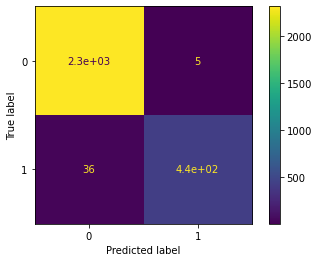

In [75]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.

### YOUR CODE HERE ###

cm = metrics.confusion_matrix(y_test, y_pred_rf_val)

# Create the display for your confusion matrix.

### YOUR CODE HERE ###

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_val.classes_)

# Plot the visual in-line.

### YOUR CODE HERE ###

disp.plot()


In [77]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', random_state=42)
cv_params = {'max_depth': [2,3,4,5, None], 
             'min_child_weight': [1,2,3],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [75, 100, 125, 150]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')


In [78]:
%%time

xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

CPU times: user 7min 43s, sys: 2.65 s, total: 7min 46s
Wall time: 3min 55s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0

In [79]:
y_pred_xgboost = xgb_cv.predict(X_test)

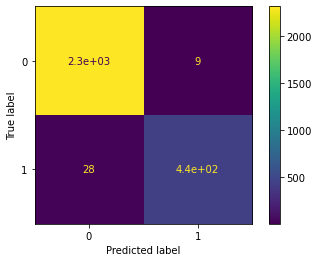

In [80]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.

### YOUR CODE HERE ###

cm = metrics.confusion_matrix(y_test, y_pred_xgboost)

# Create the display for your confusion matrix.

### YOUR CODE HERE ###

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

# Plot the visual in-line.

### YOUR CODE HERE ###

disp.plot()

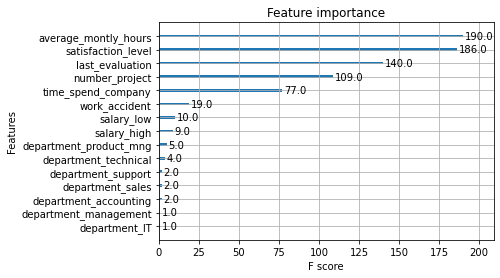

In [81]:
from xgboost import plot_importance
plot_importance(xgb_cv.best_estimator_)

In [82]:
# 1. Print your accuracy score.

### YOUR CODE HERE ###
ac_score = metrics.accuracy_score(y_test, y_pred_xgboost)
print('accuracy score:', ac_score)

# 2. Print your precision score.

### YOUR CODE HERE ###
pc_score = metrics.precision_score(y_test, y_pred_xgboost)
print('precision score:', pc_score)

# 3. Print your recall score.

### YOUR CODE HERE ###
rc_score = metrics.recall_score(y_test, y_pred_xgboost)
print('recall score:', rc_score)

# 4. Print your f1 score.

### YOUR CODE HERE ###
f1_score = metrics.f1_score(y_test, y_pred_xgboost)
print('f1 score:', f1_score)
# Create a table of results to compare model performance.

### YOUR CODE HERE ###
table3 = pd.DataFrame({'Model': ["Tuned XGBoost"],
                      'F1': [f1_score],
                      'Recall': [rc_score],
                      'Precision': [pc_score],
                      'Accuracy': [ac_score]
                     }
                    )
table3

accuracy score: 0.9867478510028653
precision score: 0.9800884955752213
recall score: 0.940552016985138
f1 score: 0.9599133261105093


,Model,F1,Recall,Precision,Accuracy
0,Tuned XGBoost,0.959913,0.940552,0.980088,0.986748


In [83]:
table = table.append(table3, ignore_index=True)
table

,Model,F1,Recall,Precision,Accuracy
0,LogisticRegression,0.313501,0.232598,0.480702,0.820949
1,DecisionTreeClassifier,0.919192,0.926995,0.911519,0.971352
2,Tuned Decision Tree,0.949343,0.921101,0.979542,0.983751
3,Random Forest CV,0.944958,0.907849,0.985378,0.982209
4,Tuned Random Forest,0.954895,0.921444,0.990868,0.985315
5,Random Forest Validated,0.947177,0.921986,0.973783,0.982687
6,Tuned XGBoost,0.959913,0.940552,0.980088,0.986748


In [84]:
table = table.sort_values(by=['F1'], ascending=False)
table

,Model,F1,Recall,Precision,Accuracy
6,Tuned XGBoost,0.959913,0.940552,0.980088,0.986748
4,Tuned Random Forest,0.954895,0.921444,0.990868,0.985315
2,Tuned Decision Tree,0.949343,0.921101,0.979542,0.983751
5,Random Forest Validated,0.947177,0.921986,0.973783,0.982687
3,Random Forest CV,0.944958,0.907849,0.985378,0.982209
1,DecisionTreeClassifier,0.919192,0.926995,0.911519,0.971352
0,LogisticRegression,0.313501,0.232598,0.480702,0.820949


💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.